In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.networks.residual_network import IdentityBlock, ResidualBlock, BasicBlock, BottleNeckBlock, ResidualLayer, ResidualNetwork

In [3]:
from text_recognizer.networks import WideResidualNetwork

In [1]:
from pathlib import Path

In [3]:
Path("/home/akternurra/Documents/projects/quest-for-general-artifical-intelligence/projects/text-recognizer/src/training/experiments/TransformerModel_EmnistLinesDataset_CNNTransformer/1112_081300/model/best.pt").exists()

True

In [4]:
Path("/home/akternurra/Documents/projects/quest-for-general-artifical-intelligence/projects/text-recognizer/src/training/experiments/TransformerModel_EmnistLinesDataset_CNNTransformer/1112_201649/model/best.pt").exists()

False

In [18]:
wr = WideResidualNetwork(
            in_channels= 1,
            num_classes= 80,
            in_planes=32,
            depth=10,
            num_layers=4,
            width_factor=1,
            dropout_rate= 0.2,
            activation= "SELU",
            use_decoder= False,
)

In [19]:
from torchsummary import summary

In [20]:
        backbone = nn.Sequential(
            *list(wr.children())[:][:-1]
        )


In [21]:
backbone

Sequential(
  (0): SELU(inplace=True)
)

In [86]:
summary(wr, (1, 28, 952), device="cpu", depth=7)

Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 256, 4, 119]         --
|    └─Conv2d: 2-1                            [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                        [-1, 32, 28, 952]         --
|    |    └─WideBlock: 3-1                    [-1, 32, 28, 952]         --
|    |    |    └─Sequential: 4-1              [-1, 32, 28, 952]         --
|    |    |    |    └─BatchNorm2d: 5-1        [-1, 32, 28, 952]         64
|    |    |    └─SELU: 4-2                    [-1, 32, 28, 952]         --
|    |    |    └─Sequential: 4                []                        --
|    |    |    |    └─SELU: 5-2               [-1, 32, 28, 952]         --
|    |    |    |    └─Conv2d: 5-3             [-1, 32, 28, 952]         9,216
|    |    |    |    └─Dropout: 5-4            [-1, 32, 28, 952]         --
|    |    |    |    └─BatchNorm2d: 5-5        [-1, 32, 28, 952]         64
|    |    |    └

Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 256, 4, 119]         --
|    └─Conv2d: 2-1                            [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                        [-1, 32, 28, 952]         --
|    |    └─WideBlock: 3-1                    [-1, 32, 28, 952]         --
|    |    |    └─Sequential: 4-1              [-1, 32, 28, 952]         --
|    |    |    |    └─BatchNorm2d: 5-1        [-1, 32, 28, 952]         64
|    |    |    └─SELU: 4-2                    [-1, 32, 28, 952]         --
|    |    |    └─Sequential: 4                []                        --
|    |    |    |    └─SELU: 5-2               [-1, 32, 28, 952]         --
|    |    |    |    └─Conv2d: 5-3             [-1, 32, 28, 952]         9,216
|    |    |    |    └─Dropout: 5-4            [-1, 32, 28, 952]         --
|    |    |    |    └─BatchNorm2d: 5-5        [-1, 32, 28, 952]         64
|    |    |    └

In [23]:
a = torch.rand(1, 1, 28, 952)

In [38]:
b = wr(a)

In [39]:
from einops import rearrange

In [40]:
b = rearrange(b, "b c h w -> b w c h")

In [41]:
c = nn.AdaptiveAvgPool2d((None, 1))

In [42]:
d = c(b)

In [43]:
d.shape

torch.Size([1, 119, 256, 1])

In [44]:
d.squeeze(3).shape

torch.Size([1, 119, 256])

In [26]:
b.shape

torch.Size([1, 256, 4, 119])

In [15]:
from torch import nn

In [70]:
32 + 64

96

In [106]:
3 * 112

336

In [39]:
col_embed = nn.Parameter(torch.rand(1000, 256 // 2))

In [40]:
W, H = 196, 4

In [42]:
col_embed[:W].unsqueeze(0).repeat(H, 1, 1).shape

torch.Size([4, 196, 128])

In [44]:
col_embed[:H].unsqueeze(1).repeat(1, W, 1).shape

torch.Size([4, 196, 128])

In [60]:
           torch.cat(
                [
                    col_embed[:W].unsqueeze(0).repeat(H, 1, 1),
                    col_embed[:H].unsqueeze(1).repeat(1, W, 1),
                ],
                dim=-1,
            ).unsqueeze(0).shape

torch.Size([1, 4, 196, 256])

In [21]:
4 * 196

784

In [39]:
target = torch.tensor([1,1,12,1,1,1,1,1,9,9,9,9,9,9])

In [14]:
torch.nonzero(target == 9, as_tuple=False)[0].item()

8

In [16]:
target[:9]

tensor([ 1,  1, 12,  1,  1,  1,  1,  1,  9])

In [9]:
np.inf

inf

In [5]:
from text_recognizer.networks.transformer.positional_encoding import PositionalEncoding

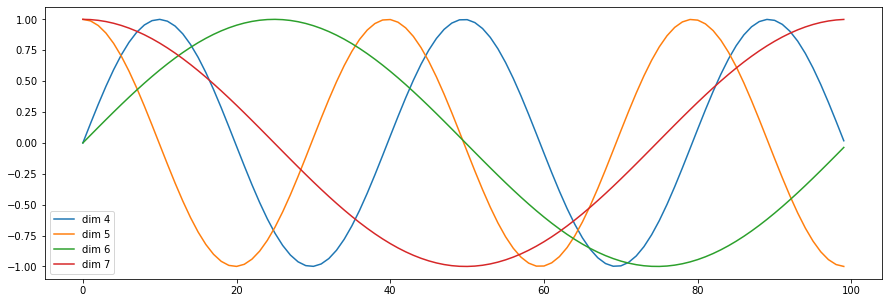

In [4]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None

In [45]:
from text_recognizer.networks.densenet import DenseNet,_DenseLayer,_DenseBlock

In [57]:
dnet = DenseNet(12, (6, 12, 10), 1, 24, 80, 4, 0, True)

In [58]:
216 / 8

27.0

In [59]:
summary(dnet, (1, 28, 952), device="cpu", depth=3)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 80]                  --
|    └─Conv2d: 2-1                       [-1, 24, 28, 952]         216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 952]         48
|    └─ReLU: 2-3                         [-1, 24, 28, 952]         --
|    └─_DenseBlock: 2-4                  [-1, 96, 28, 952]         --
|    └─_Transition: 2-5                  [-1, 48, 14, 476]         --
|    |    └─Sequential: 3-1              [-1, 48, 14, 476]         4,800
|    └─_DenseBlock: 2-6                  [-1, 192, 14, 476]        --
|    └─_Transition: 2-7                  [-1, 96, 7, 238]          --
|    |    └─Sequential: 3-2              [-1, 96, 7, 238]          18,816
|    └─_DenseBlock: 2-8                  [-1, 216, 7, 238]         --
|    └─ReLU: 2-9                         [-1, 216, 7, 238]         --
|    └─AdaptiveAvgPool2d: 2-10           [-1, 216, 1, 1]           --
|    └─

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 80]                  --
|    └─Conv2d: 2-1                       [-1, 24, 28, 952]         216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 952]         48
|    └─ReLU: 2-3                         [-1, 24, 28, 952]         --
|    └─_DenseBlock: 2-4                  [-1, 96, 28, 952]         --
|    └─_Transition: 2-5                  [-1, 48, 14, 476]         --
|    |    └─Sequential: 3-1              [-1, 48, 14, 476]         4,800
|    └─_DenseBlock: 2-6                  [-1, 192, 14, 476]        --
|    └─_Transition: 2-7                  [-1, 96, 7, 238]          --
|    |    └─Sequential: 3-2              [-1, 96, 7, 238]          18,816
|    └─_DenseBlock: 2-8                  [-1, 216, 7, 238]         --
|    └─ReLU: 2-9                         [-1, 216, 7, 238]         --
|    └─AdaptiveAvgPool2d: 2-10           [-1, 216, 1, 1]           --
|    └─

In [84]:
        backbone = nn.Sequential(
            *list(dnet.children())[:][:-4]
        )

In [85]:
backbone

Sequential()

In [29]:
from text_recognizer.networks import WideResidualNetwork

In [9]:
w = WideResidualNetwork(
        in_channels = 1,
        in_planes = 32,
        num_classes = 80,
        depth = 10,
        width_factor = 1,
        dropout_rate = 0.0,
        num_layers = 5,
        activation = "relu",
        use_decoder = False,)

In [10]:
summary(w, (1, 28, 952), device="cpu", depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 2, 60]          --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         918,272
|    └─Sequential: 2-6                   [-1, 512, 2, 60]          3,671,552
Total params: 4,895,968
Trainable params: 4,895,968
Non-trainable params: 0
Total mult-adds (M): 22.36
Input size (MB): 0.10
Forward/backward pass size (MB): 6.51
Params size (MB): 18.68
Estimated Total Size (MB): 25.29


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 2, 60]          --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         918,272
|    └─Sequential: 2-6                   [-1, 512, 2, 60]          3,671,552
Total params: 4,895,968
Trainable params: 4,895,968
Non-trainable params: 0
Total mult-adds (M): 22.36
Input size (MB): 0.10
Forward/backward pass size (MB): 6.51
Params size (MB): 18.68
Estimated Total Size (MB): 25.29

In [46]:
sz= 5

In [47]:
mask = torch.triu(torch.ones(sz, sz), 1)
mask = mask.masked_fill(mask==1, float('-inf'))

In [50]:

h = torch.rand(1, 256, 10, 10)

In [52]:
h.flatten(2).permute(2, 0, 1).shape

torch.Size([100, 1, 256])

In [91]:
h.flatten(2).permute(2, 0, 1).shape

torch.Size([100, 1, 256])

In [48]:
mask


tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [59]:
pred = torch.Tensor([1,1,1,1,1, 81, 1, 79, 79, 79, 2,1,1,1,1, 81, 1, 79, 79, 79, 1,1,1,1,1, 81, 79, 79, 79, 79]).long()
target = torch.Tensor([1,1,1,1,1, 81, 79, 79, 79, 79, 1,1,1,1,1, 81, 79, 79, 79, 79, 1,1,1,1,1, 81, 79, 79, 79, 79]).long()

In [32]:
from text_recognizer.models.metrics import accuracy

In [61]:
pad_indcies = torch.nonzero(target == 79, as_tuple=False)

In [76]:
t1 = torch.nonzero(target == 81, as_tuple=False).squeeze(1)

In [66]:
target.shape[0]

30

In [84]:
t2 = torch.arange(10, target.shape[0] + 1, 10)

In [85]:
t2

tensor([10, 20, 30])

In [89]:
for start, stop in zip(t1, t2):
    pred[start+1:stop] = 79

In [90]:
pred

tensor([ 1,  1,  1,  1,  1, 81, 79, 79, 79, 79,  2,  1,  1,  1,  1, 81, 79, 79,
        79, 79,  1,  1,  1,  1,  1, 81, 79, 79, 79, 79])

In [88]:
[pred[start+1:stop] = 79 for start, stop in zip(t1, t2)]

SyntaxError: invalid syntax (<ipython-input-88-b8a4aef86401>, line 1)

In [69]:
pad_indcies

tensor([[ 6],
        [ 7],
        [ 8],
        [ 9],
        [16],
        [17],
        [18],
        [19],
        [26],
        [27],
        [28],
        [29]])

In [71]:
pred[pad_indcies:pad_indcies] = 79

TypeError: only integer tensors of a single element can be converted to an index

In [50]:
pred.shape

torch.Size([20])

In [51]:
target.shape

torch.Size([20])

In [91]:
accuracy(pred, target)

0.0

In [92]:
acc = (pred == target).sum().float() / target.shape[0]

In [93]:
acc

tensor(0.9667)